In [11]:

#### Create Gym Data for regression in Python ####
import pandas as pd
import numpy as np
ColumnNames=['Hours','Calories', 'Weight']
DataValues=[[  1.0,   2500,   95],
             [  2.0,   2000,   85],
             [  2.5,   1900,   83],
             [  3.0,   1850,   81],
             [  3.5,   1600,   80],
             [  4.0,   1500,   78],
             [  5.0,   1500,   77],
             [  5.5,   1600,   80],
             [  6.0,   1700,   75],
             [  6.5,   1500,   70]]
#Create the Data Frame
GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()
 
#Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=GymData[Predictors].values
y=GymData[TargetVariable].values
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
###### Random Forest Regression in Python #######
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(n_estimators=100,criterion='mse')
 
#Printing all the parameters of Random Forest
print(RegModel)
 


RandomForestRegressor(criterion='mse')


In [14]:
RegModel = RandomForestRegressor(criterion='squared_error')
DTree=RegModel.fit(X_train,y_train)
prediction=DTree.predict(X_test)

In [15]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DTree.predict(X_train)))

R2 Value: 0.896497976878613


In [16]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 97.30549019607842


<Axes: >

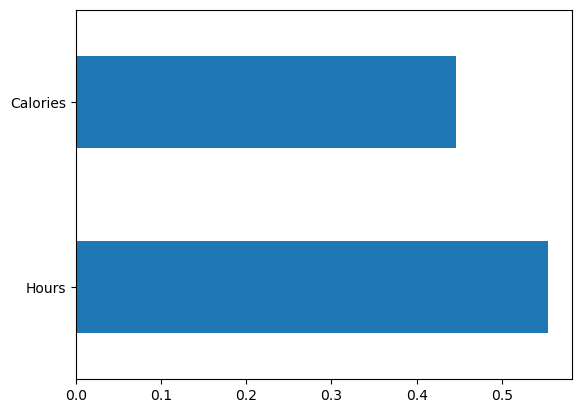

In [17]:
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [18]:
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()

Hours  Calories  Weight  PredictedWeight
0    6.0    1700.0      75            78.08
1    2.0    2000.0      85            83.91